In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv("../Data/maize_labeled.csv")

In [5]:
data.head()

,STATIONNAME,LONGITUDE,LATITUDE,ELEVATION_METER,COUNTRY,CROP,YA,YW,YW-YA,YP,...,AREA_IN_CLIMATEZONE_HA,MIN_N_INPUT_TARGET_30_PERC,MIN_N_INPUT_TARGET_50_PERC,MIN_N_INPUT_TARGET_80_PERC,nitrogen,phosphorus,potassium,ph,bulk_density,cation_exchange
0,Goodhope,25.260,-25.280,NaN,Botswana,Rainfed maize,0.250219,1.992642,1.742423,9.894520,...,8152,12.076619,20.127698,33.730424,0.5,163.0,4.5,6.4,1.57,7.2
1,Kanye,25.400,-25.000,NaN,Botswana,Rainfed maize,0.171145,2.700077,2.528932,10.187806,...,10898,16.364104,27.273507,45.705522,0.7,120.5,5.7,6.3,1.47,7.2
2,Bobo-Dioulasso,-4.317,11.167,445.0,Burkina Faso,Rainfed maize,1.980000,8.803804,6.823804,10.657895,...,158555,53.356388,88.927314,149.026281,0.8,65.7,5.7,6.1,1.52,9.0
3,Bogandé,-0.137,12.974,281.0,Burkina Faso,Rainfed maize,1.050000,5.276038,4.226038,10.055556,...,32846,31.975989,53.293315,89.310069,0.4,59.3,7.2,6.2,1.59,7.2
4,Boromo,-2.933,11.750,243.0,Burkina Faso,Rainfed maize,1.920000,8.380198,6.460198,10.077778,...,161472,50.789079,84.648465,141.855695,0.5,72.7,7.2,6.7,1.64,9.0


In [11]:
def plot_histogram(nutrient,data,measurement="kg/ha"):
    plt.xlabel(f"{nutrient} Ratio {measurement}")
    plt.ylabel(f"Number of Data Points")
    plt.title(f"{nutrient} Histogram")
    plt.hist(data)
    plt.savefig(f"../output/plots/{nutrient}Histogram.png")
    plt.show()

# def plot_crop_vs_nutrient(nutrient,column,measurement="kg/ha"):
#     plt.figure(figsize=(10, 6))
#     for crop, group in data.groupby('label'):
#         plt.scatter(group[column], group['label'], label=crop)

#         # Set labels and title
#     plt.xlabel(f'{nutrient} Values measurement')
#     plt.ylabel('Crop')
#     plt.title(f'{nutrient} Values vs Crop')
#     plt.legend()
#     plt.savefig(f"output/plots/{nutrient}ValuesvsCropscatter.png")

#     # Show plot
#     plt.show()

# labels = data["label"].unique()
# def plot_x_vs_label(feature,nutrient,measurement="kg/ha"):
#     labels_cat = []
#     for label in labels:
#         labels_cat.append(data[data["label"]==label][feature])
#     fig = plt.figure(figsize=(25,6))
#     plt.title(f"{nutrient} vs crops")
#     plt.ylabel(f"{measurement}")
#     plt.xticks([i for i in range(1,len(data["label"].unique())+1)],data["label"].unique())
#     plt.violinplot(labels_cat)
#     plt.savefig(f"output/plots/{nutrient}ValuesvsCropviolin.png")

#     # Show plot
#     plt.show()
    

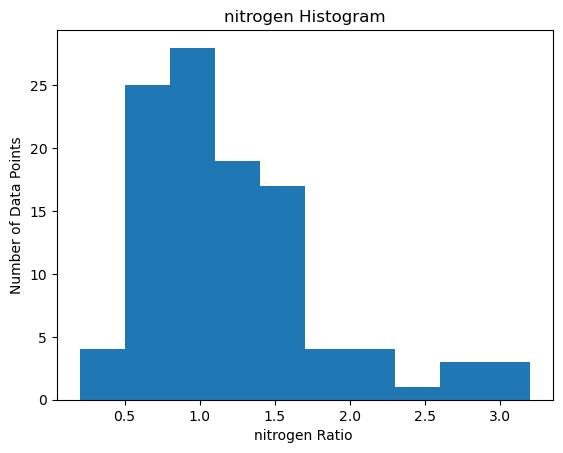

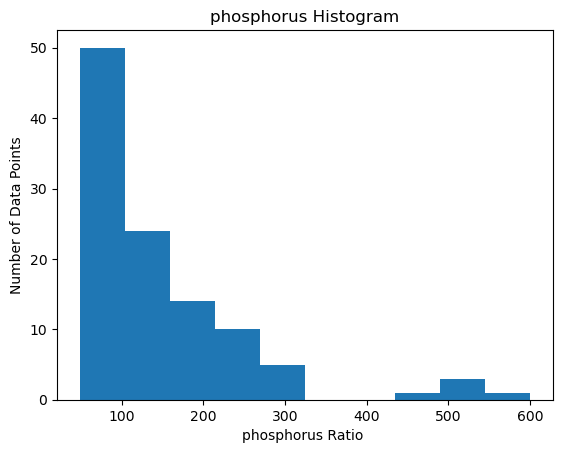

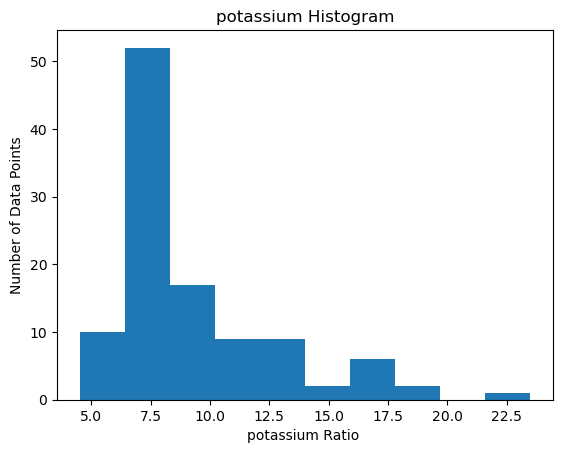

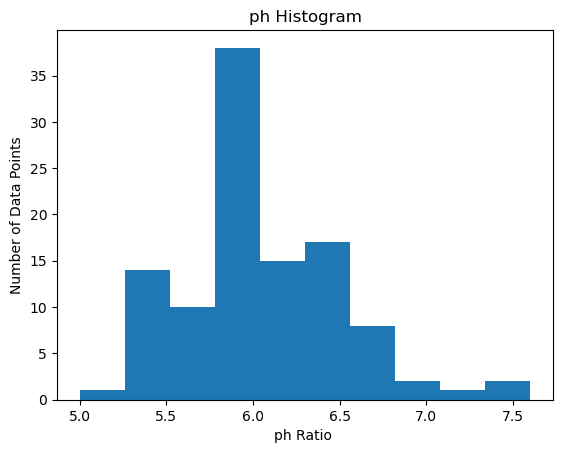

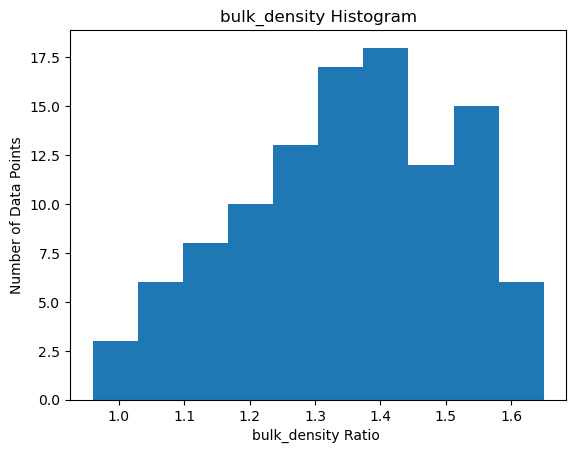

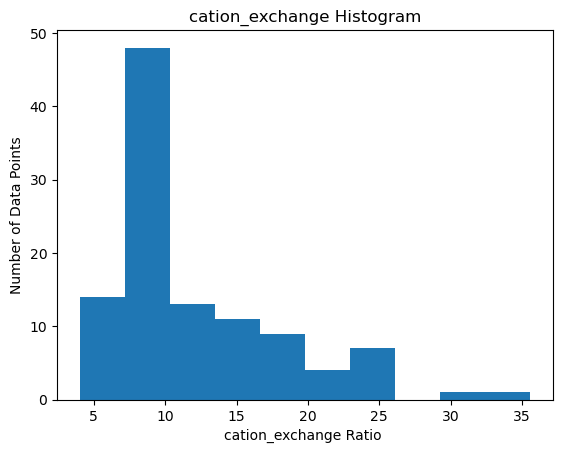

In [12]:
important_columns=["nitrogen","phosphorus","potassium","ph","bulk_density","cation_exchange"]
for col in  important_columns:
    plot_histogram(col,data[col],"")

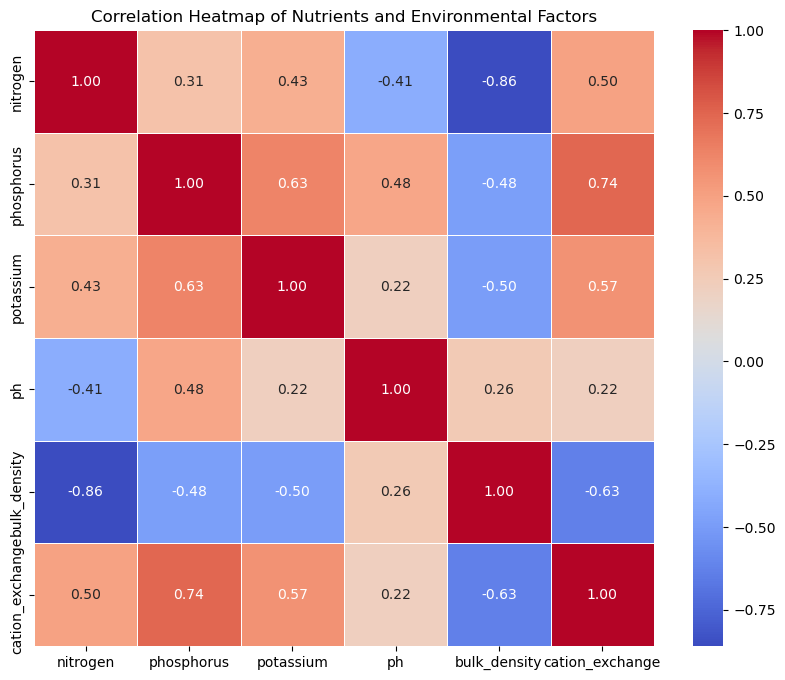

In [14]:
correlation_matrix = data[important_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Nutrients and Environmental Factors')
plt.savefig(f"../output/plots/HeatMap.png")


plt.show()